In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x0, x1 = 0, 200
step = 10
c = np.arange(x0, x1 + 1, step)
c

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200])

In [3]:
def dist(x1, x2):
    return np.abs(x1 - x2)

dist(2, 5)

np.int64(3)

In [4]:
zarr = np.array([101, 82, 91, 112, 99, 151, 96, 85, 99, 105], dtype=int)
zarr

array([101,  82,  91, 112,  99, 151,  96,  85,  99, 105])

In [5]:
def log_odd(p):
    return np.log(p / (1 - p))

def prob(l):
    return 1 / (1 + np.exp(-l))

val = 0.4
assert prob(log_odd(val)) == val

In [6]:
prior = 0.5

larr = np.empty(len(c))
larr.fill(log_odd(prior))
larr

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [7]:
for z in zarr:
    for i, coord in enumerate(c):
        if coord < z:
            larr[i] += log_odd(0.3)
            continue
        if dist(coord, z) <= 20:
            larr[i] += log_odd(0.6)
            continue

parr = prob(larr)
parr

array([2.08997635e-04, 2.08997635e-04, 2.08997635e-04, 2.08997635e-04,
       2.08997635e-04, 2.08997635e-04, 2.08997635e-04, 2.08997635e-04,
       2.08997635e-04, 2.55421549e-03, 2.77599394e-01, 6.76601011e-01,
       5.91240876e-01, 3.91304348e-01, 3.00000000e-01, 3.00000000e-01,
       6.00000000e-01, 6.00000000e-01, 5.00000000e-01, 5.00000000e-01,
       5.00000000e-01])

In [9]:
for p in parr:
    print(p, end=' ')

0.0002089976346871699 0.0002089976346871699 0.0002089976346871699 0.0002089976346871699 0.0002089976346871699 0.0002089976346871699 0.0002089976346871699 0.0002089976346871699 0.0002089976346871699 0.002554215493705344 0.2775993944892882 0.6766010106218416 0.5912408759124086 0.3913043478260869 0.30000000000000004 0.30000000000000004 0.6 0.6 0.5 0.5 0.5 

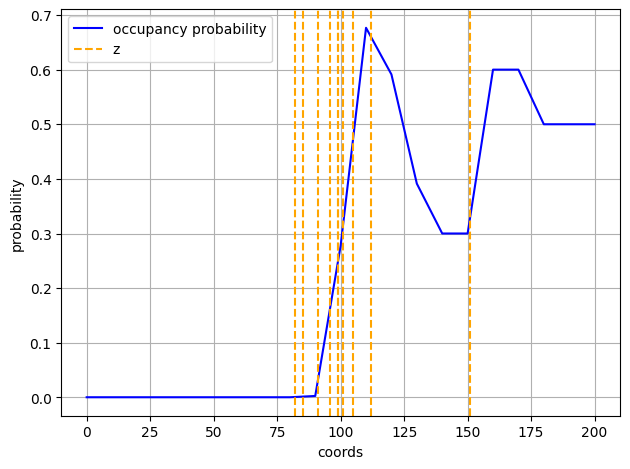

In [13]:
plt.plot(c, parr, color='b', label=r'occupancy probability')

for i, z in enumerate(zarr):
    if i == 0:
        plt.axvline(z, color='orange', linestyle='--', label=r'z')
        continue
    plt.axvline(z, color='orange', linestyle='--')

plt.xlabel(r'coords')
plt.ylabel(r'probability')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()